In [4]:
!pip install pmdarima
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 25.6 MB/s eta 0:00:00


In [5]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
stock_data = pd.read_csv('dse_cp_SQURPHARMA.csv',sep=',', index_col='DATE', parse_dates=['DATE'], date_parser=dateparse).fillna(0)
stock_data
stock_data = stock_data.dropna()
print('shape of data' , stock_data.shape)
stock_data = stock_data.sort_values(by='DATE')
stock_data.head()

shape of data (245, 4)


<ipython-input-5-76efcbeb1ed9>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')


,#,TRADING CODE,CLOSEP*,YCP
DATE,,,,
2022-10-16,245,SQURPHARMA,209.8,209.8
2022-10-17,244,SQURPHARMA,209.8,209.8
2022-10-18,243,SQURPHARMA,209.8,209.8
2022-10-19,242,SQURPHARMA,209.8,209.8
2022-10-20,241,SQURPHARMA,209.8,209.8


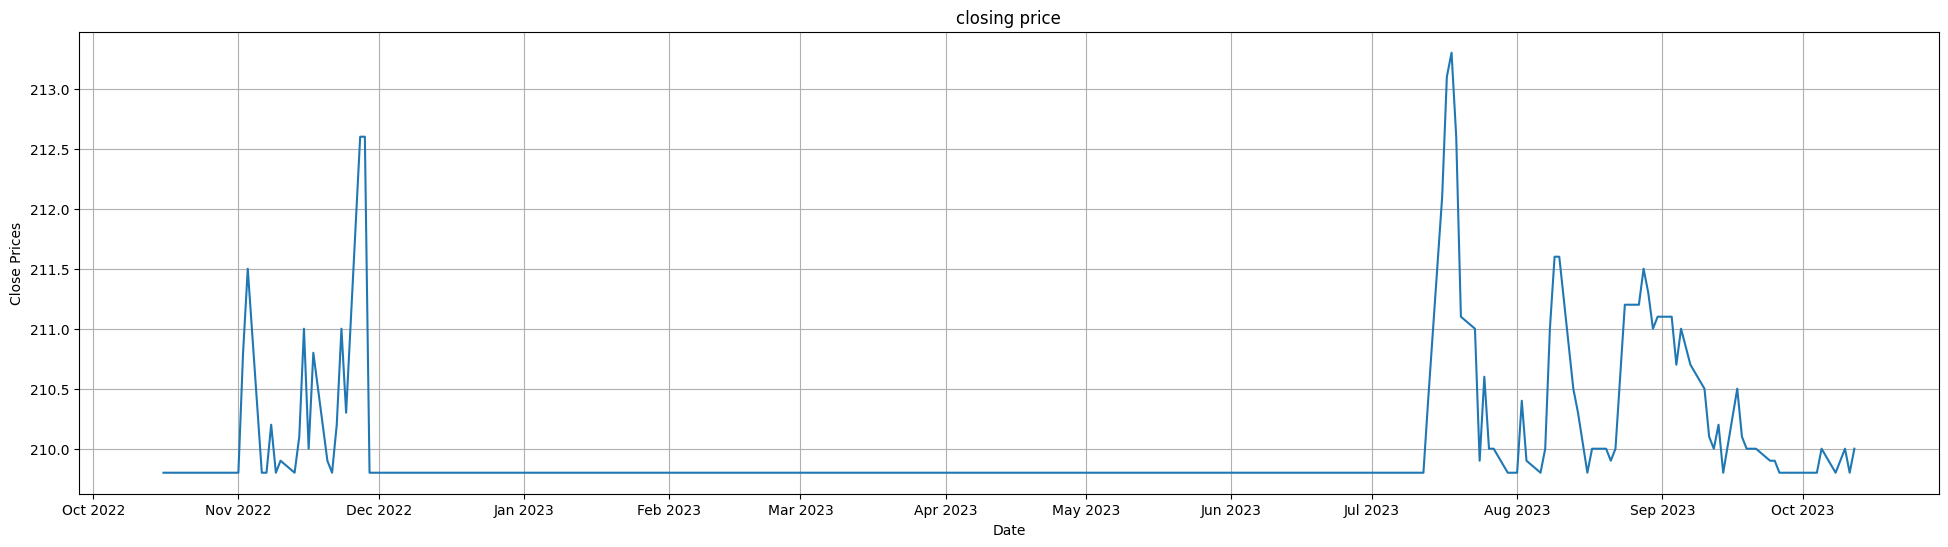

In [6]:
import matplotlib.dates as mdates
plt.figure(figsize=(24,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Close Prices')
plt.plot(stock_data['CLOSEP*'])
plt.title('closing price')
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.show()

# checking **stationarity**

In [ ]:
def adf_test(dataset):
  dftest = adfuller(dataset, autolag = 'AIC')
  print("2. P-value : ",dftest[1])

In [ ]:
 adf_test(stock_data['CLOSEP*'])

2. P-value :  8.669050276603763e-07


p value less than 0.05.So the data is stationary

In [9]:
df_close = stock_data['CLOSEP*']


In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

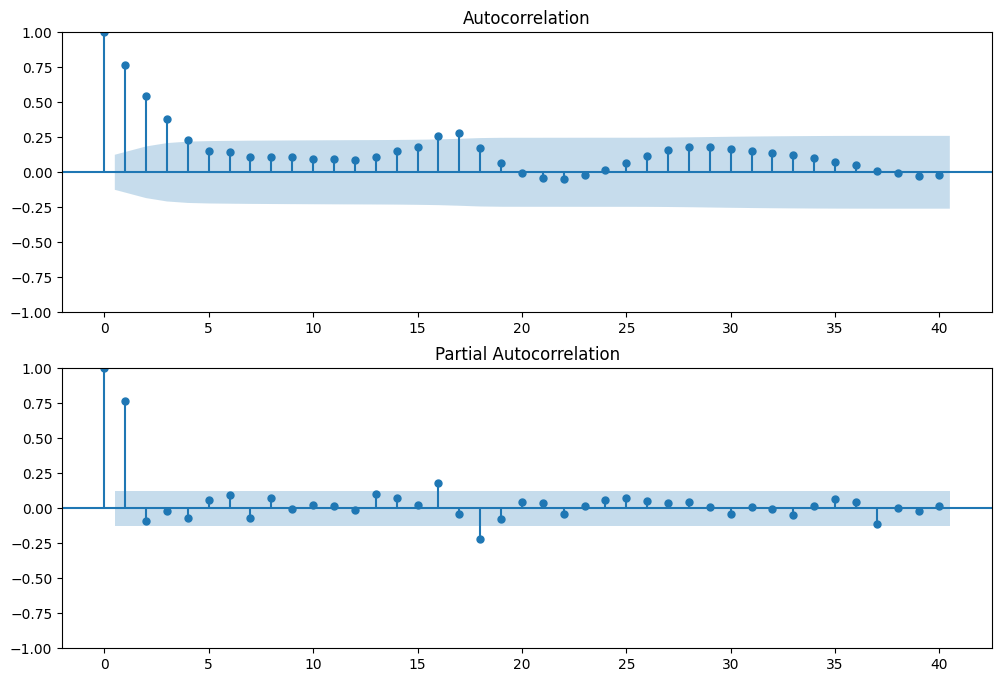

In [ ]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_close,lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_close,lags=40,ax=ax2)

from the plot we can see get p=1 d=0 and q=4
we will try auto arima and take the model with less errors

### **90% training data**

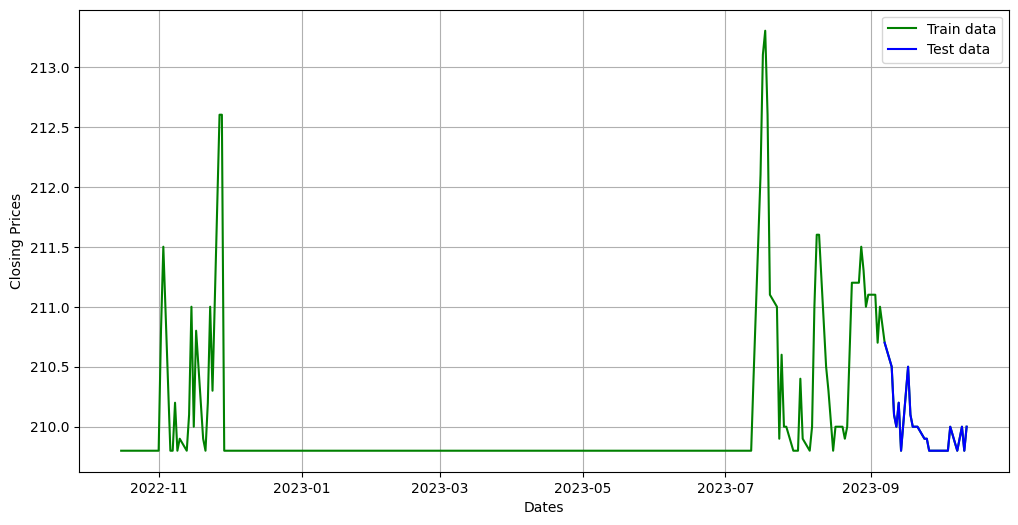

In [ ]:
train_data, test_data = df_close[3:int(len(df_close)*0.9)], df_close[int(len(df_close)*0.9):]
plt.figure(figsize=(12,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_close, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

In [ ]:
import pmdarima as pm
auto_arima = pm.auto_arima(df_close, stepwise=False, seasonal=False)
auto_arima
auto_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  245
Model:               SARIMAX(0, 1, 5)   Log Likelihood                -101.431
Date:                Thu, 02 Nov 2023   AIC                            216.862
Time:                        21:50:11   BIC                            241.342
Sample:                             0   HQIC                           226.721
                                - 245                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0010      0.008      0.113      0.910      -0.016       0.018
ma.L1         -0.1458      0.050     -2.911      0.004      -0.244      -0.048
ma.L2         -0.2208      0.039     -5.714      0.000      -0.297      -0.145
ma.L3         -0.1360      0.050     -2.711      0.007      -0.234      -0.038
ma.L4         -0.1967      0.062     -3.155      0.002      -0.319      -0.074
ma.L5         -0.1962      0.047     -4.130      0.000      -0.289      -0.103
sigma2         0.1336      0.008     17.020      0.000       0.118       0.149
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):              1916.51
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               0.78   Skew:                             0.99
Prob(H) (two-sided):                  0.27   Kurtosis:                        16.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train_data, order=(1,0,4))
fitted = model.fit()
model_summary = fitted.summary()
print(model_summary)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                CLOSEP*   No. Observations:                  217
Model:                 ARIMA(1, 0, 4)   Log Likelihood                 -99.013
Date:                Thu, 02 Nov 2023   AIC                            212.026
Time:                        21:52:08   BIC                            235.686
Sample:                             0   HQIC                           221.584
                                - 217                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        210.0364      0.126   1671.406      0.000     209.790     210.283
ar.L1         -0.1661      0.239     -0.694      0.487      -0.635       0.303
ma.L1          1.0352      0.241      4.290      0.0

Ljung-Box (L1) (Q): 0.01 .. this low value indicates that the model's residuals do not exhibit autocorrelation, which is a desirable characteristic for forecasting models. The ARIMA model is providing a good fit to the time series data

# table for real and predicted **price**

In [ ]:
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from math import sqrt

rmse = sqrt(mean_squared_error(result, test_data))
mae = mean_absolute_error(test_data, result)
mape = mean_absolute_percentage_error(test_data, result)
result = fitted.forecast(test, alpha=0.05)
data = { 'DATE' : test_data.index, 'real price': test_data.values, 'Forecasted price': result,'RMSE': rmse, 'MAE': mae,  'MAPE': mape}
data_df = pd.DataFrame(data)

print(data_df)

          DATE  real price  Forecasted price      RMSE      MAE      MAPE
217 2023-09-07       210.7        210.727594  0.187662  0.15622  0.000744
218 2023-09-10       210.5        210.406430  0.187662  0.15622  0.000744
219 2023-09-11       210.1        210.259514  0.187662  0.15622  0.000744
220 2023-09-12       210.0        210.154755  0.187662  0.15622  0.000744
221 2023-09-13       210.2        210.016801  0.187662  0.15622  0.000744
222 2023-09-14       209.8        210.039710  0.187662  0.15622  0.000744
223 2023-09-17       210.5        210.035906  0.187662  0.15622  0.000744
224 2023-09-18       210.1        210.036537  0.187662  0.15622  0.000744
225 2023-09-19       210.0        210.036432  0.187662  0.15622  0.000744
226 2023-09-20       210.0        210.036450  0.187662  0.15622  0.000744
227 2023-09-21       210.0        210.036447  0.187662  0.15622  0.000744
228 2023-09-24       209.9        210.036447  0.187662  0.15622  0.000744
229 2023-09-25       209.9        210.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


Ljung-Box (L1) (Q): 0.08 .. this value indicates that the model's residuals exhibit little evidence of autocorrelation. The ARIMA model is providing a good fit to the time series data

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_i

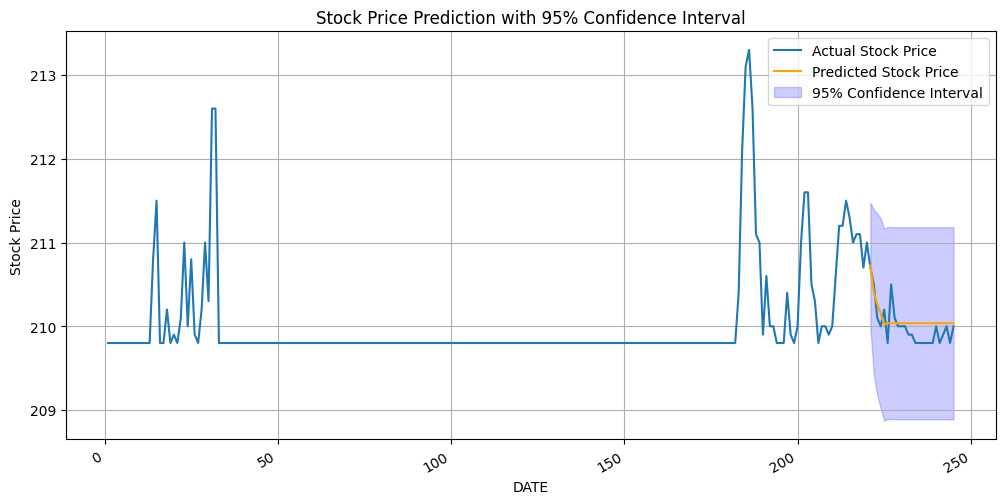

In [ ]:
import matplotlib.pyplot as plt

stock_data.sort_values(by='#', inplace=True)

total = len(df_close)
test = len(test_data)
train = total - test

result = fitted.forecast(test, alpha=0.05)

conf_ins = fitted.get_forecast(test).summary_frame()

dates = stock_data['#']
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(dates, df_close.values, label='Actual Stock Price')
ax.plot(dates[train:], result, label='Predicted Stock Price', color='orange')
ax.fill_between(dates[train:], conf_ins['mean_ci_lower'], conf_ins['mean_ci_upper'], color='blue', alpha=0.2, label='95% Confidence Interval')
ax.set_xlabel('DATE')
ax.set_ylabel('Stock Price')
ax.set_title('Stock Price Prediction with 95% Confidence Interval')
ax.legend()
fig.autofmt_xdate()
ax.grid(True)
plt.show()

**error for 90% train data**

In [ ]:
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from math import sqrt

# Calculate the evaluation metrics
rmse = sqrt(mean_squared_error(result, test_data))
mae = mean_absolute_error(test_data, result)
mape = mean_absolute_percentage_error(test_data, result)

# Create a DataFrame to display the metrics
metrics_df = pd.DataFrame({'Metric': ['RMSE', 'MAE', 'MAPE'],
                            'Value': [rmse, mae, mape]})

# Display the table
print(metrics_df)

  Metric     Value
0   RMSE  0.187662
1    MAE  0.156220
2   MAPE  0.000744


### ***80% TRAIN 20% TEST***

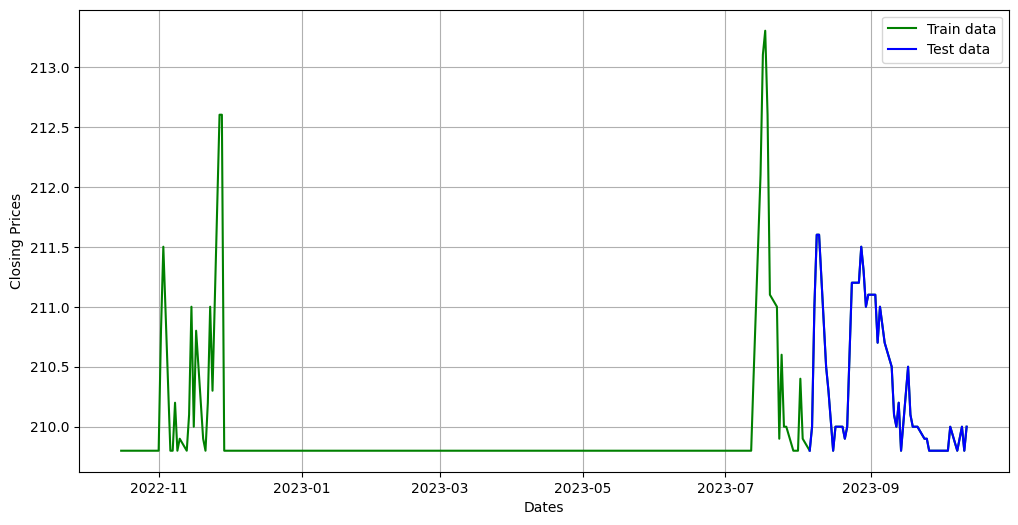

In [ ]:
train_data, test_data = df_close[10:int(len(df_close)*0.8)], df_close[int(len(df_close)*0.81111):]
plt.figure(figsize=(12,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_close, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train_data, order=(1,0,4))
fitted = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from math import sqrt
result = fitted.forecast(test, alpha=0.05)
rmse = sqrt(mean_squared_error(result, test_data))
mae = mean_absolute_error(test_data, result)
mape = mean_absolute_percentage_error(test_data, result)

data = { 'DATE' : test_data.index, 'real price': test_data.values, 'Forecasted price': result,'RMSE': rmse, 'MAE': mae,  'MAPE': mape}
data_df = pd.DataFrame(data)

print(data_df)

          DATE  real price  Forecasted price     RMSE       MAE      MAPE
186 2023-08-06       209.8        209.962701  0.67253  0.447797  0.002123
187 2023-08-07       210.0        209.955658  0.67253  0.447797  0.002123
188 2023-08-08       211.0        209.999870  0.67253  0.447797  0.002123
189 2023-08-09       211.6        209.985385  0.67253  0.447797  0.002123
190 2023-08-10       211.6        209.957315  0.67253  0.447797  0.002123
191 2023-08-13       210.5        209.958471  0.67253  0.447797  0.002123
192 2023-08-14       210.3        209.958423  0.67253  0.447797  0.002123
193 2023-08-16       209.8        209.958425  0.67253  0.447797  0.002123
194 2023-08-17       210.0        209.958425  0.67253  0.447797  0.002123
195 2023-08-20       210.0        209.958425  0.67253  0.447797  0.002123
196 2023-08-21       209.9        209.958425  0.67253  0.447797  0.002123
197 2023-08-22       210.0        209.958425  0.67253  0.447797  0.002123
198 2023-08-23       210.6        209.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_i

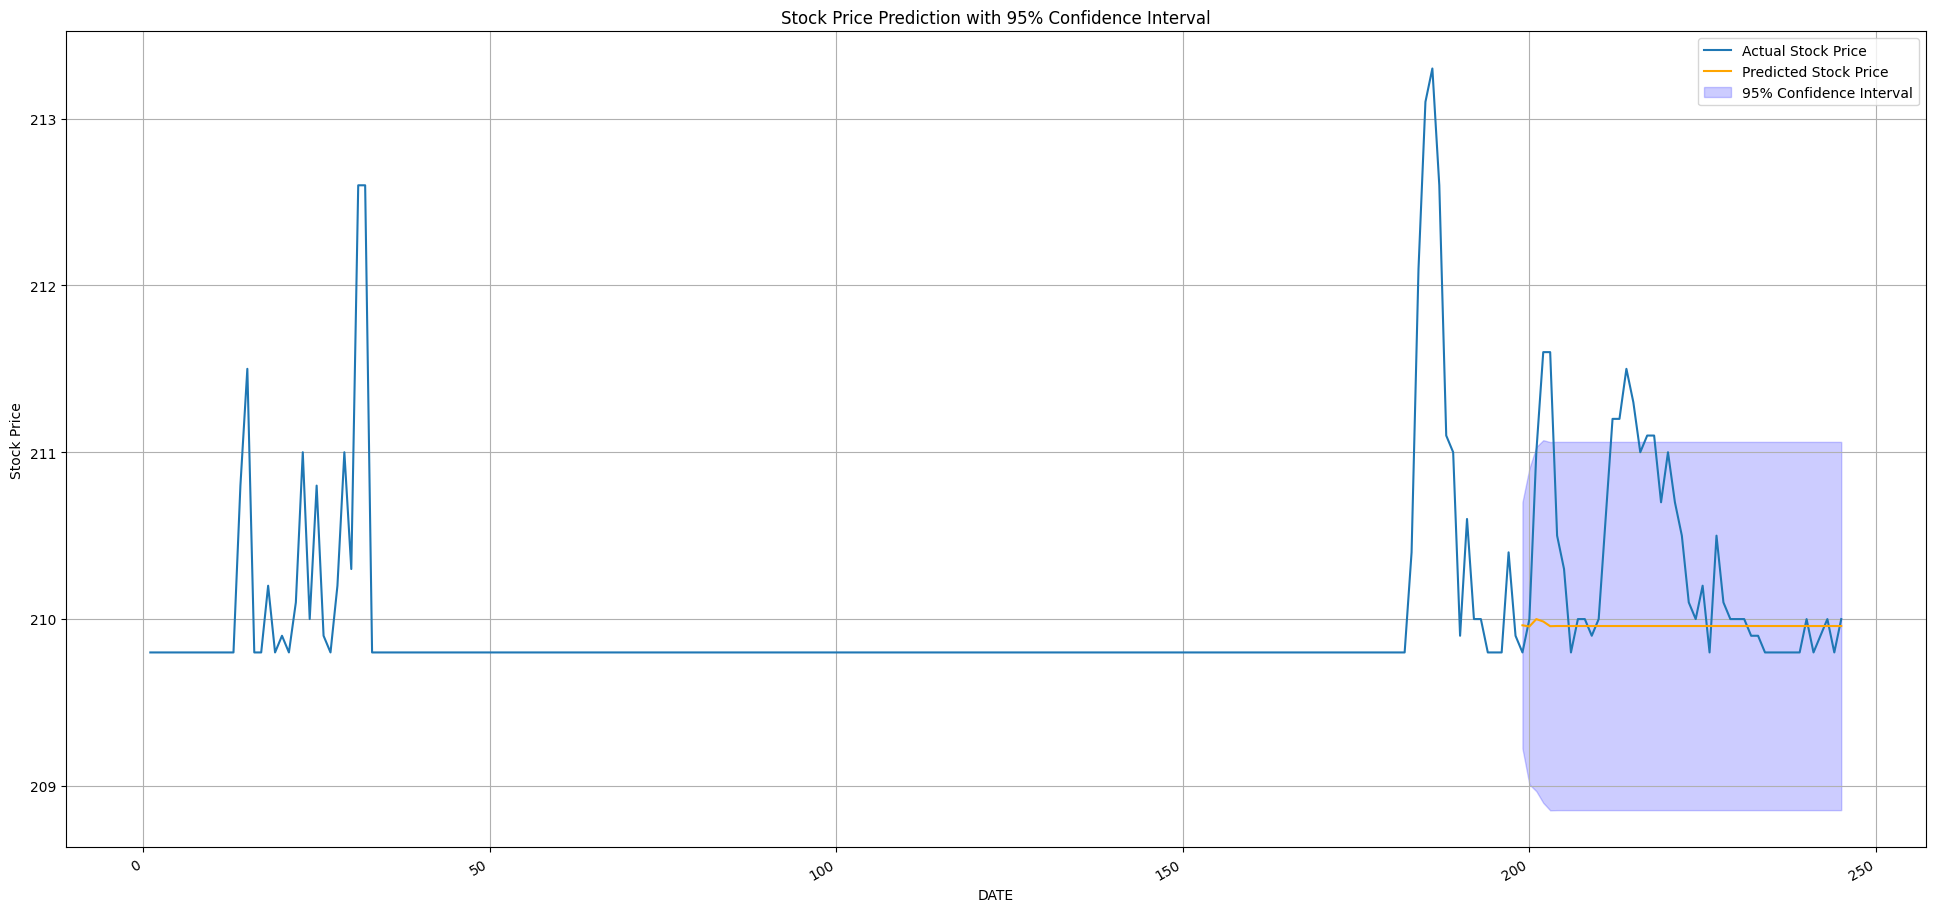

In [ ]:
import matplotlib.pyplot as plt

stock_data.sort_values(by='#', inplace=True)

total = len(df_close)
test = len(test_data)
train = total - test

result = fitted.forecast(test, alpha=0.05)


conf_ins = fitted.get_forecast(test).summary_frame()


dates = stock_data['#']
fig, ax = plt.subplots(figsize=(24, 12))
ax.plot(dates, df_close.values, label='Actual Stock Price')
ax.plot(dates[train:], result, label='Predicted Stock Price', color='orange')
ax.fill_between(dates[train:], conf_ins['mean_ci_lower'], conf_ins['mean_ci_upper'], color='blue', alpha=0.2, label='95% Confidence Interval')
ax.set_xlabel('DATE')
ax.set_ylabel('Stock Price')
ax.set_title('Stock Price Prediction with 95% Confidence Interval')
ax.legend()
fig.autofmt_xdate()
ax.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from math import sqrt
test_data.mean()
rmse=sqrt(mean_squared_error(result,test_data))
print("RMSE:",rmse)

mae = mean_absolute_error(test_data, result)
print("MAE:", mae)

mape = mean_absolute_percentage_error(test_data, result)
print("MAPE:", mape)

RMSE: 0.6725296538405666
MAE: 0.4477974121706142
MAPE: 0.0021228321537992314


# 70%train **data**

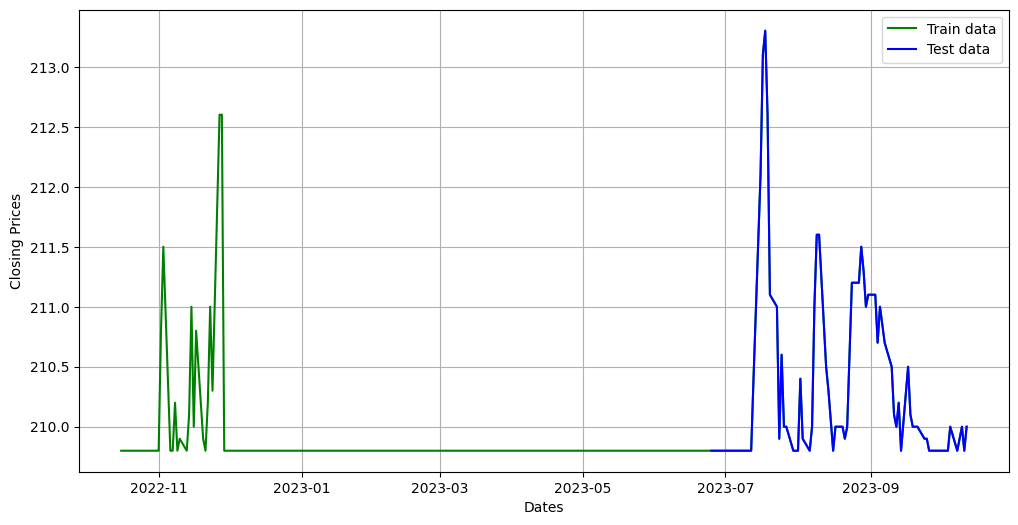

In [ ]:
train_data, test_data = df_close[10:int(len(df_close)*0.7)], df_close[int(len(df_close)*0.7):]
plt.figure(figsize=(12,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_close, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train_data, order=(1,0,4))
fitted = model.fit()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from math import sqrt

rmse = sqrt(mean_squared_error(result, test_data))
mae = mean_absolute_error(test_data, result)
mape = mean_absolute_percentage_error(test_data, result)
result = fitted.forecast(test, alpha=0.05)
data = { 'DATE' : test_data.index, 'real price': test_data.values, 'Forecasted price': result,'RMSE': rmse, 'MAE': mae,  'MAPE': mape}
data_df = pd.DataFrame(data)

print(data_df)

          DATE  real price  Forecasted price      RMSE       MAE      MAPE
161 2023-06-25       209.8        209.826269  0.920683  0.530449  0.002508
162 2023-06-26       209.8        209.840369  0.920683  0.530449  0.002508
163 2023-07-02       209.8        209.844256  0.920683  0.530449  0.002508
164 2023-07-03       209.8        209.849079  0.920683  0.530449  0.002508
165 2023-07-04       209.8        209.851214  0.920683  0.530449  0.002508
..         ...         ...               ...       ...       ...       ...
230 2023-10-08       209.8        209.894098  0.920683  0.530449  0.002508
231 2023-10-09       209.9        209.894199  0.920683  0.530449  0.002508
232 2023-10-10       210.0        209.894295  0.920683  0.530449  0.002508
233 2023-10-11       209.8        209.894387  0.920683  0.530449  0.002508
234 2023-10-12       210.0        209.894475  0.920683  0.530449  0.002508

[74 rows x 6 columns]


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_i

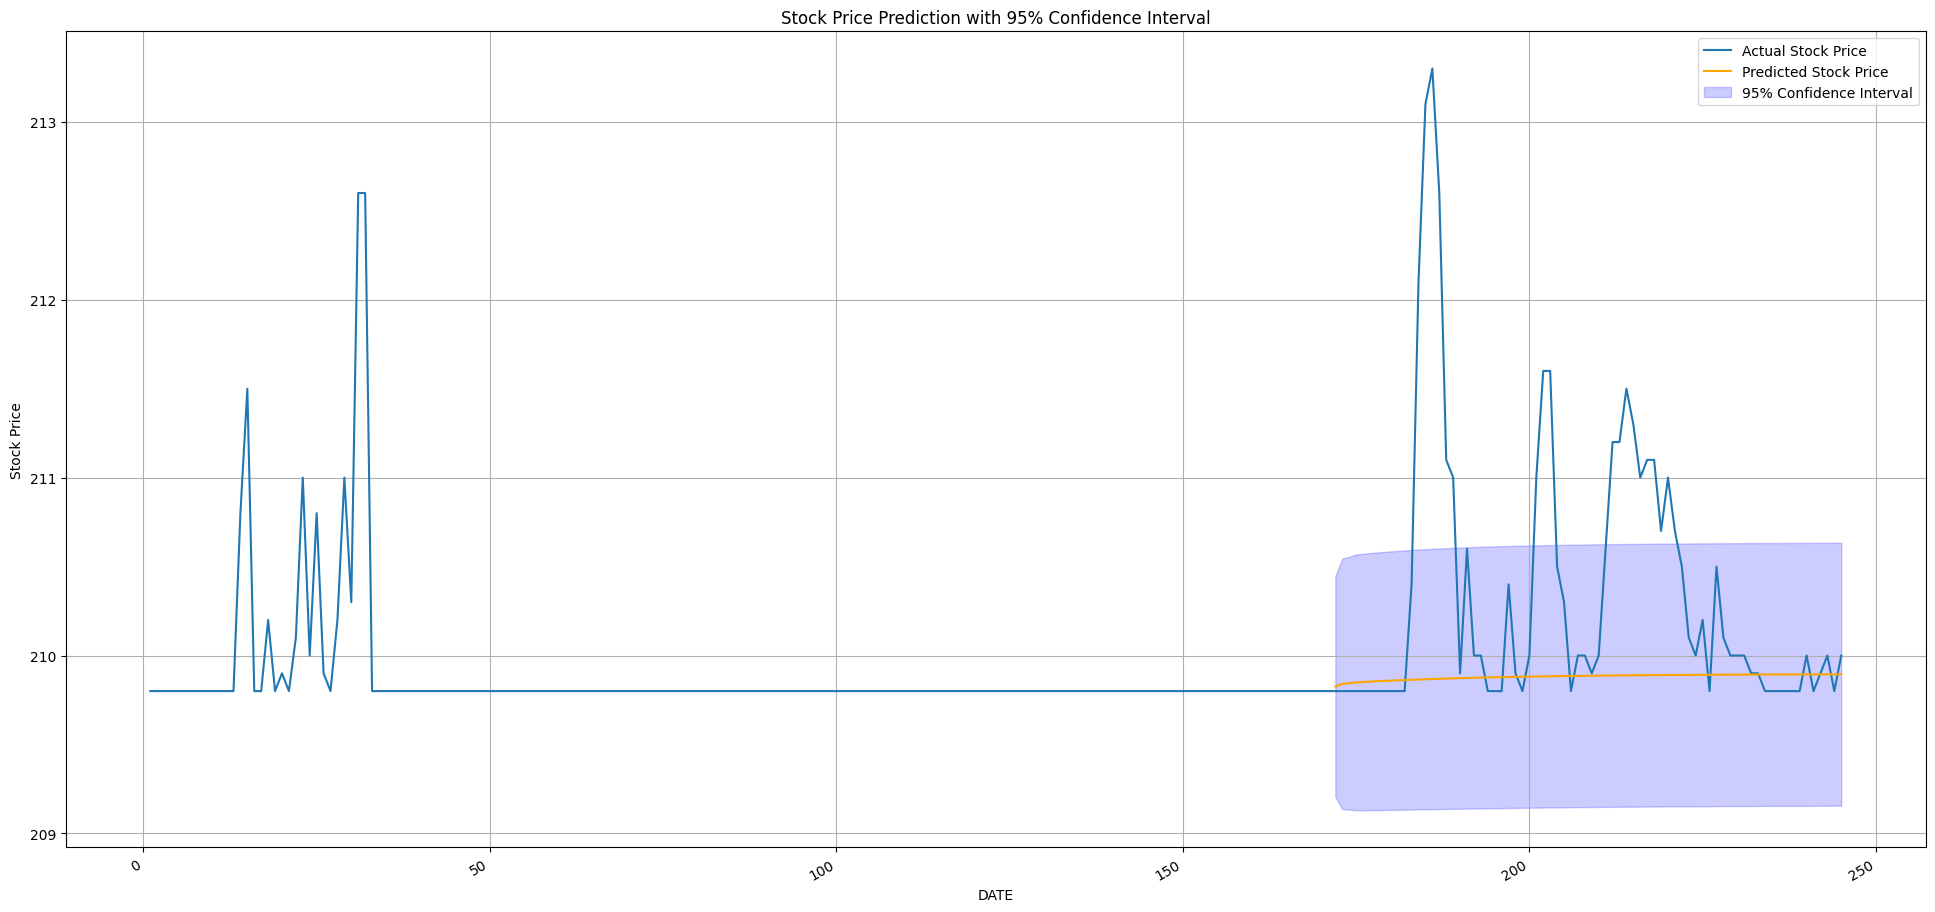

In [ ]:
import matplotlib.pyplot as plt

stock_data.sort_values(by='#', inplace=True)


total = len(df_close)
test = len(test_data)
train = total - test

result = fitted.forecast(test, alpha=0.05)

conf_ins = fitted.get_forecast(test).summary_frame()

dates = stock_data['#']
fig, ax = plt.subplots(figsize=(24, 12))
ax.plot(dates, df_close.values, label='Actual Stock Price')
ax.plot(dates[train:], result, label='Predicted Stock Price', color='orange')
ax.fill_between(dates[train:], conf_ins['mean_ci_lower'], conf_ins['mean_ci_upper'], color='blue', alpha=0.2, label='95% Confidence Interval')
ax.set_xlabel('DATE')
ax.set_ylabel('Stock Price')
ax.set_title('Stock Price Prediction with 95% Confidence Interval')
ax.legend()
fig.autofmt_xdate()
ax.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from math import sqrt
test_data.mean()
rmse=sqrt(mean_squared_error(result,test_data))
print("RMSE:",rmse)

mae = mean_absolute_error(test_data, result)
print("MAE:", mae)

mape = mean_absolute_percentage_error(test_data, result)
print("MAPE:", mape)

RMSE: 0.9206827085953343
MAE: 0.530448659065802
MAPE: 0.002508442370366033


## ***Short prediction***

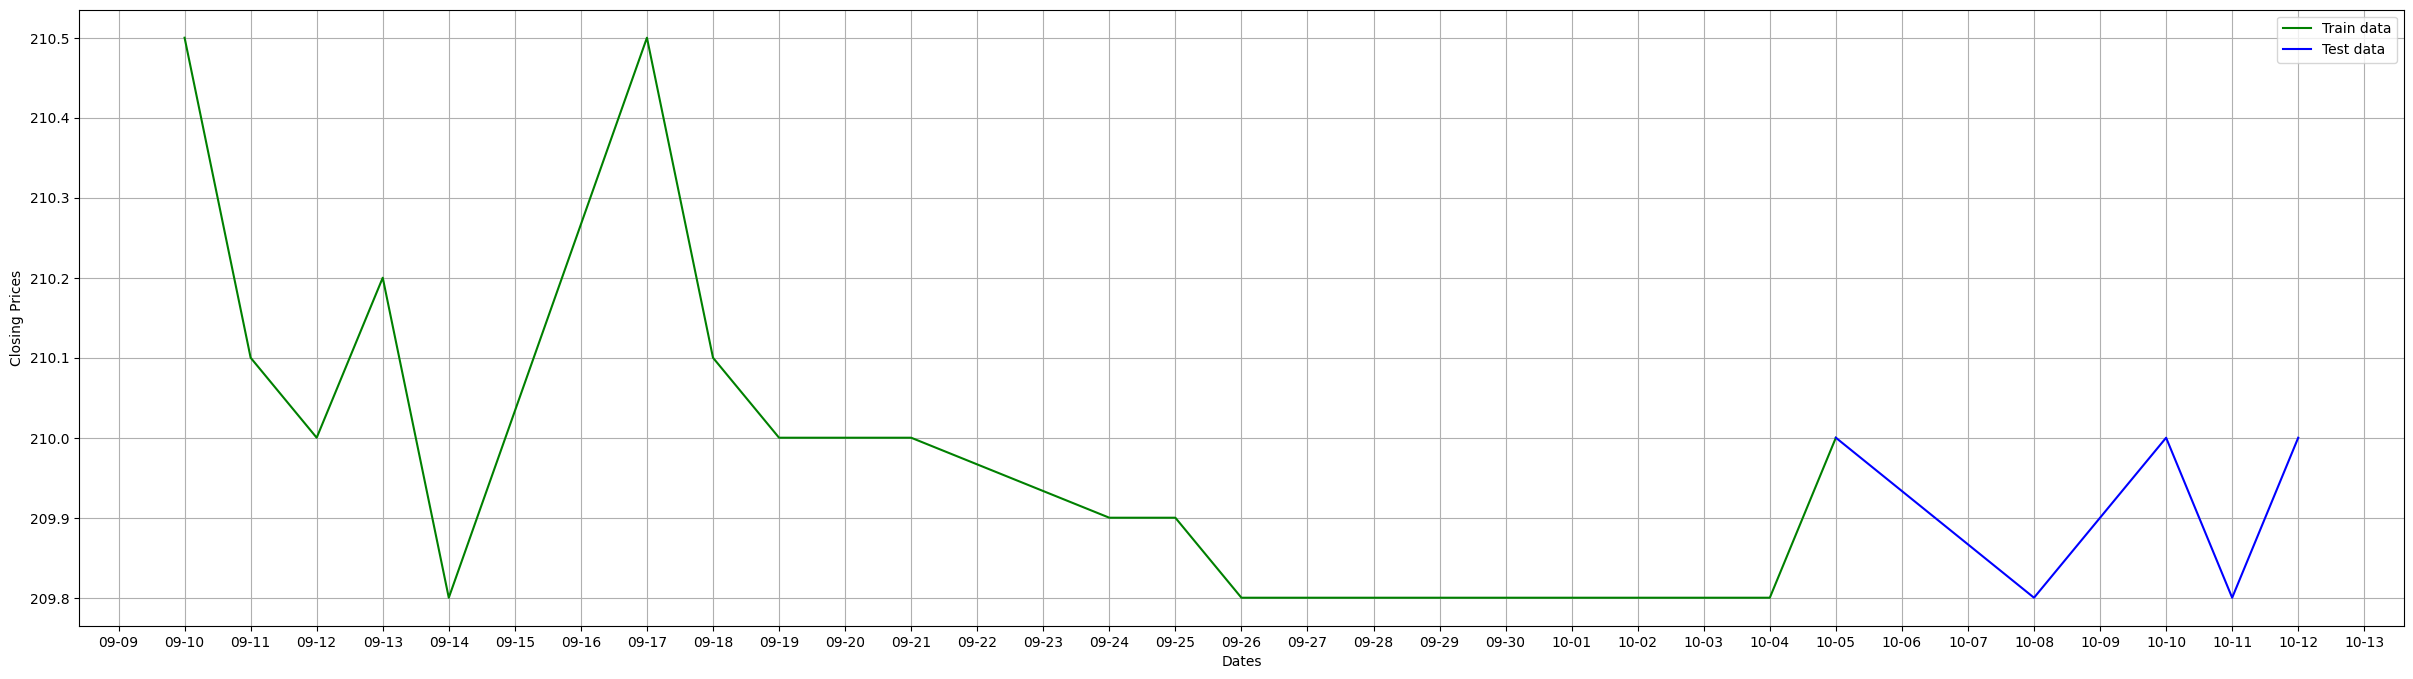

In [10]:
stock_30 = stock_data[-30:]
last_month = df_close[-30:]
train_data = df_close[-24:-5]
test_data = df_close[-6:]

plt.figure(figsize=(30, 8))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(train_data, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')

date_format = mdates.DateFormatter("%m-%d")
plt.gca().xaxis.set_major_formatter(date_format)
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))
plt.legend()

In [11]:
import pmdarima as pm
auto_arima = pm.auto_arima(last_month, seasonal=False)
auto_arima

ARIMA(order=(1, 1, 0), scoring_args={}, suppress_warnings=True)

In [14]:
def adf_test(dataset):
  dftest = adfuller(dataset, autolag = 'AIC')
  print("2. P-value : ",dftest[1])

In [15]:
adf_test(df_close[-30:])

2. P-value :  0.13561218286303262


/usr/local/lib/python3.10/dist-packages/matplotlib/axes/_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


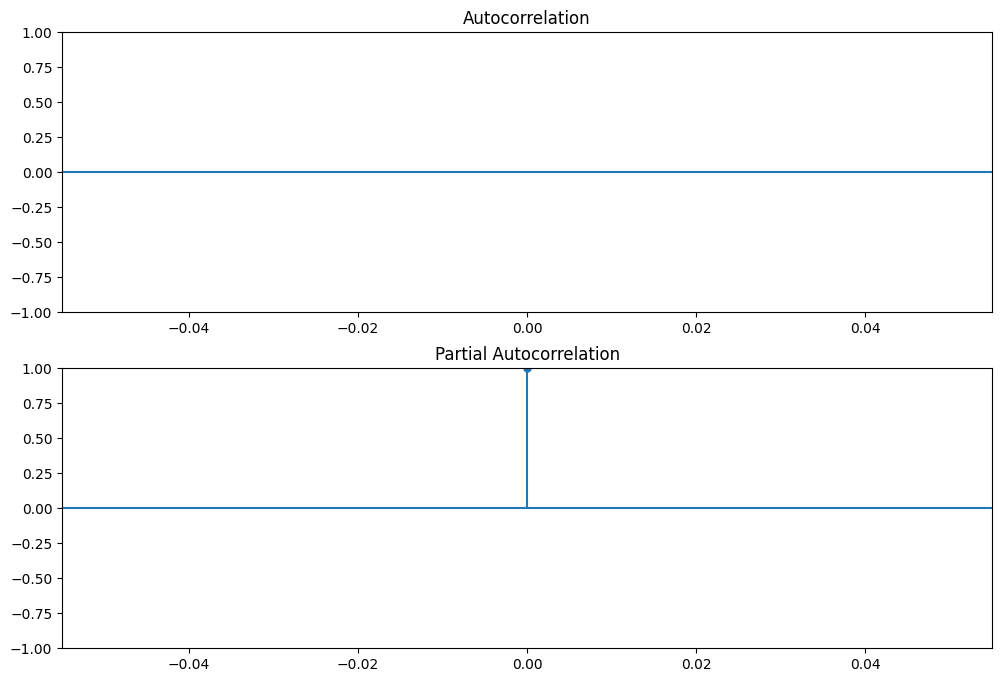

In [17]:
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(last_month.diff(),lags=10,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(last_month.diff(),lags=10,ax=ax2)

In [27]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train_data, order=(1,1,0))
fitted = model.fit()
fitted.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                CLOSEP*   No. Observations:                   19
Model:                 ARIMA(1, 1, 0)   Log Likelihood                   3.277
Date:                Fri, 03 Nov 2023   AIC                             -2.554
Time:                        15:30:48   BIC                             -0.774
Sample:                             0   HQIC                            -2.309
                                 - 19                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6086      0.146     -4.178      0.000      -0.894      -0.323
sigma2         0.0396      0.013      3.038      0.002       0.014       0.065
===================================================================================
Ljung-Box (L1) (Q):                   0.45   Jarque-Bera (JB):                 1.10
Prob(Q):                              0.50   Prob(JB):                         0.58
Heteroskedasticity (H):               0.08   Skew:                             0.50
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<ipython-input-23-8bc2adfc6dca>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_30.sort_values(by='#', inplace=True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments wil

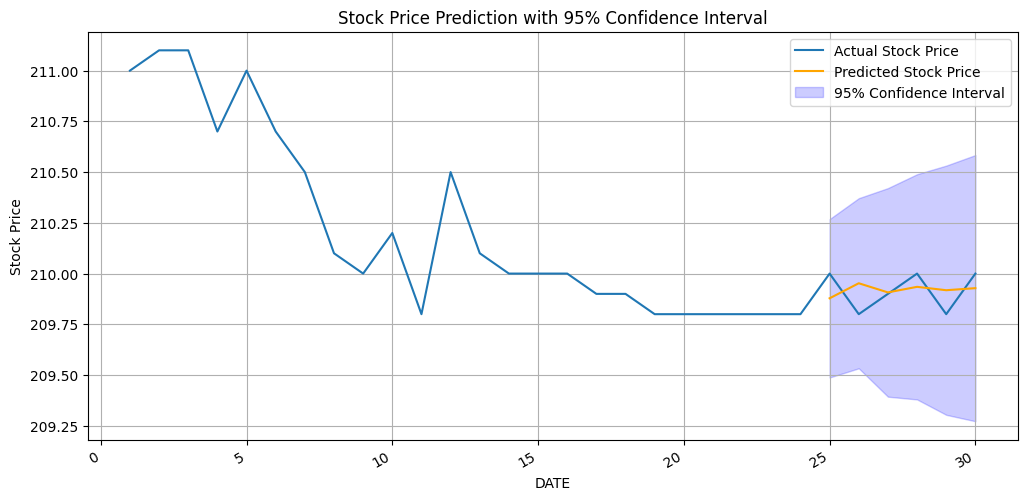

In [23]:
import matplotlib.pyplot as plt

stock_30.sort_values(by='#', inplace=True)

total = len(last_month)
test = len(test_data)
train = total - test

result = fitted.forecast(test, alpha=0.05)
conf_ins = fitted.get_forecast(test).summary_frame()

dates = stock_30['#']
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(dates, last_month.values, label='Actual Stock Price')
ax.plot(dates[train:], result, label='Predicted Stock Price', color='orange')
ax.fill_between(dates[train:], conf_ins['mean_ci_lower'], conf_ins['mean_ci_upper'], color='blue', alpha=0.2, label='95% Confidence Interval')
ax.set_xlabel('DATE')
ax.set_ylabel('Stock Price')
ax.set_title('Stock Price Prediction with 95% Confidence Interval')
ax.legend()
fig.autofmt_xdate()
ax.grid(True)
plt.show()


In [24]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from math import sqrt
test_data.mean()
rmse=sqrt(mean_squared_error(result,test_data))
print("RMSE:",rmse)

mae = mean_absolute_error(test_data, result)
print("MAE:", mae)

mape = mean_absolute_percentage_error(test_data, result)
print("MAPE:", mape)

RMSE: 0.10118510449994175
MAE: 0.08941282885275352
MAPE: 0.00042598268229522394


In [25]:
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from math import sqrt

rmse = sqrt(mean_squared_error(result, test_data))
mae = mean_absolute_error(test_data, result)
mape = mean_absolute_percentage_error(test_data, result)
result = fitted.forecast(test, alpha=0.05)
data = { 'DATE' : test_data.index, 'real price': test_data.values, 'Forecasted price': result,'RMSE': rmse, 'MAE': mae,  'MAPE': mape}
data_df = pd.DataFrame(data)

print(data_df)

         DATE  real price  Forecasted price      RMSE       MAE      MAPE
19 2023-10-05       210.0        209.878277  0.101185  0.089413  0.000426
20 2023-10-08       209.8        209.952359  0.101185  0.089413  0.000426
21 2023-10-09       209.9        209.907272  0.101185  0.089413  0.000426
22 2023-10-10       210.0        209.934713  0.101185  0.089413  0.000426
23 2023-10-11       209.8        209.918012  0.101185  0.089413  0.000426
24 2023-10-12       210.0        209.928176  0.101185  0.089413  0.000426


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
